In [4]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [5]:
import numpy as np
from dare.utils.nodeconstructorcable import NodeConstructorCable
import matplotlib.pyplot as plt
import scipy
import control
import copy
import networkx as nx
import random

In [7]:
def generate_sin(num, t, V_eff=230 * np.sqrt(2), f0 = 50):
    v = list()
    for i in range(num):
        v.append(V_eff * np.sin(2*np.pi * f0 * t+i))
    out = np.vstack(v)
    return out

In [34]:
CM = np.array([[0,1,3],
              [-1,0,2],
              [-3,-2,0]])

In [180]:
Grid_FC = NodeConstructorCable(6, 6)

In [ ]:
Grid_FC.get_A_col()

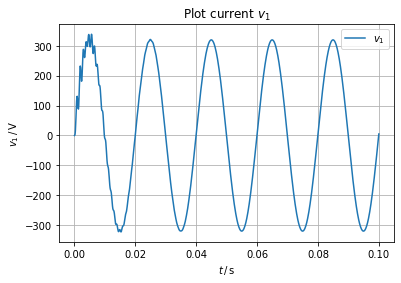

In [185]:
Grid_FC = NodeConstructorCable(2, 1, CM=CM)
A, B, C, D = Grid_FC.get_sys()
sys = control.ss(A, B, C, D)

# define time vector
ts = 1e-4
t_end = 0.1
steps = int(1/ts)
t = np.arange(0, t_end+ts, ts)
num_samples = len(t)

# generate init state
x0 = np.zeros((A.shape[0],1))

# simple input signal of constant 230V from all sources
u = generate_sin(Grid_FC.num_source, t, f0=50)

T1, yout, xout1 = control.forced_response(sys, T=t, U=u, X0=x0, return_x=True, squeeze=True)

plt.plot(t, xout1[1], label='$v_1$')
plt.xlabel(r'$t\,/\,\mathrm{s}$')
plt.ylabel('$v_{\mathrm{1}}\,/\,\mathrm{V}$')
plt.title('Plot current $v_1$')
plt.legend()
plt.grid()
plt.show()